In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [2]:
%cd ..
%ls ./data

/home/den/dev/git/time-series-analysis/final-task
shop_sales.csv  shop_sales_dates.csv  shop_sales_prices.csv


# EDA

In [ ]:
sales = pd.read_csv("./data/shop_sales.csv")
dates = pd.read_csv("./data/shop_sales_dates.csv")
prices = pd.read_csv("./data/shop_sales_prices.csv")

In [ ]:
utils.pretty_info(sales, "sales")
utils.pretty_info(dates, "dates")
utils.pretty_info(prices, "prices")

sales:
  Columns: ['item_id', 'store_id', 'date_id', 'cnt']
  Rows: 81855
--------------------------------------------------
dates:
  Columns: ['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'date_id', 'CASHBACK_STORE_1', 'CASHBACK_STORE_2', 'CASHBACK_STORE_3']
  Rows: 1819
--------------------------------------------------
prices:
  Columns: ['store_id', 'item_id', 'wm_yr_wk', 'sell_price']
  Rows: 11141
--------------------------------------------------


Далее буду работать с магазином `store_id = STORE_1`.

In [ ]:
sales = sales[sales["store_id"] == "STORE_1"]
dates.drop(columns=["CASHBACK_STORE_2", "CASHBACK_STORE_3"], inplace=True)
prices = prices[prices["store_id"] == "STORE_1"]

In [ ]:
utils.pretty_info(sales, "sales")
utils.pretty_info(dates, "dates")
utils.pretty_info(prices, "prices")

sales:
  Columns: ['item_id', 'store_id', 'date_id', 'cnt']
  Rows: 27285
--------------------------------------------------
dates:
  Columns: ['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'date_id', 'CASHBACK_STORE_1']
  Rows: 1819
--------------------------------------------------
prices:
  Columns: ['store_id', 'item_id', 'wm_yr_wk', 'sell_price']
  Rows: 3873
--------------------------------------------------


In [ ]:
unique_items = sales["item_id"].unique()
n_items = len(unique_items)
print(f"Number of unique items: {n_items}")

Number of unique items: 15


In [ ]:
for item in unique_items:
    item_sales = sales[sales["item_id"] == item]
    first_date = item_sales["date_id"].min()
    last_date = item_sales["date_id"].max()
    print(f"{item}: first date_id = {first_date}, last date_id = {last_date}")

STORE_1_064: first date_id = 1, last date_id = 1819
STORE_1_065: first date_id = 1, last date_id = 1819
STORE_1_325: first date_id = 1, last date_id = 1819
STORE_1_376: first date_id = 1, last date_id = 1819
STORE_1_090: first date_id = 1, last date_id = 1819
STORE_1_252: first date_id = 1, last date_id = 1819
STORE_1_339: first date_id = 1, last date_id = 1819
STORE_1_546: first date_id = 1, last date_id = 1819
STORE_1_547: first date_id = 1, last date_id = 1819
STORE_1_555: first date_id = 1, last date_id = 1819
STORE_1_584: first date_id = 1, last date_id = 1819
STORE_1_586: first date_id = 1, last date_id = 1819
STORE_1_587: first date_id = 1, last date_id = 1819
STORE_1_714: first date_id = 1, last date_id = 1819
STORE_1_727: first date_id = 1, last date_id = 1819


У нас по-дневные данные продаж в `sales`.  
Для всех товаров временной диапазон продаж одинаков - это хорошо. 

In [ ]:
n_days = sales["date_id"].max() - sales["date_id"].min() + 1
print(f"Number of days in sales data: {n_days}")
n_weeks = n_days / 7
n_months = n_days / 30
n_quarters = n_days / (4 * 30)
n_years = n_days / 365
print(f"Number of weeks in sales data: {n_weeks}")
print(f"Number of months in sales data: {n_months}")
print(f"Number of quarters in sales data: {n_quarters}")
print(f"Number of years in sales data: {n_years}")

Number of days in sales data: 1819
Number of weeks in sales data: 259.85714285714283
Number of months in sales data: 60.63333333333333
Number of quarters in sales data: 15.158333333333333
Number of years in sales data: 4.983561643835617


Временной диапазон длительный (почти 5 лет). Поэтому по идее мы даже сможем захватить годовую сезонность (так как для "захвата" сезонности требуется, чтобы было хотя бы 2 периода в train сплите).

Примерный план по сплиту данных: 
* train: фиксированно возьмем 2 года - сразу до val сплита
* val: пред-последние 4 месяца (квартал)
* test: последние 4 месяца (квартал) 

По заданию требуется делать прогноз на неделю/месяц/квартал. 

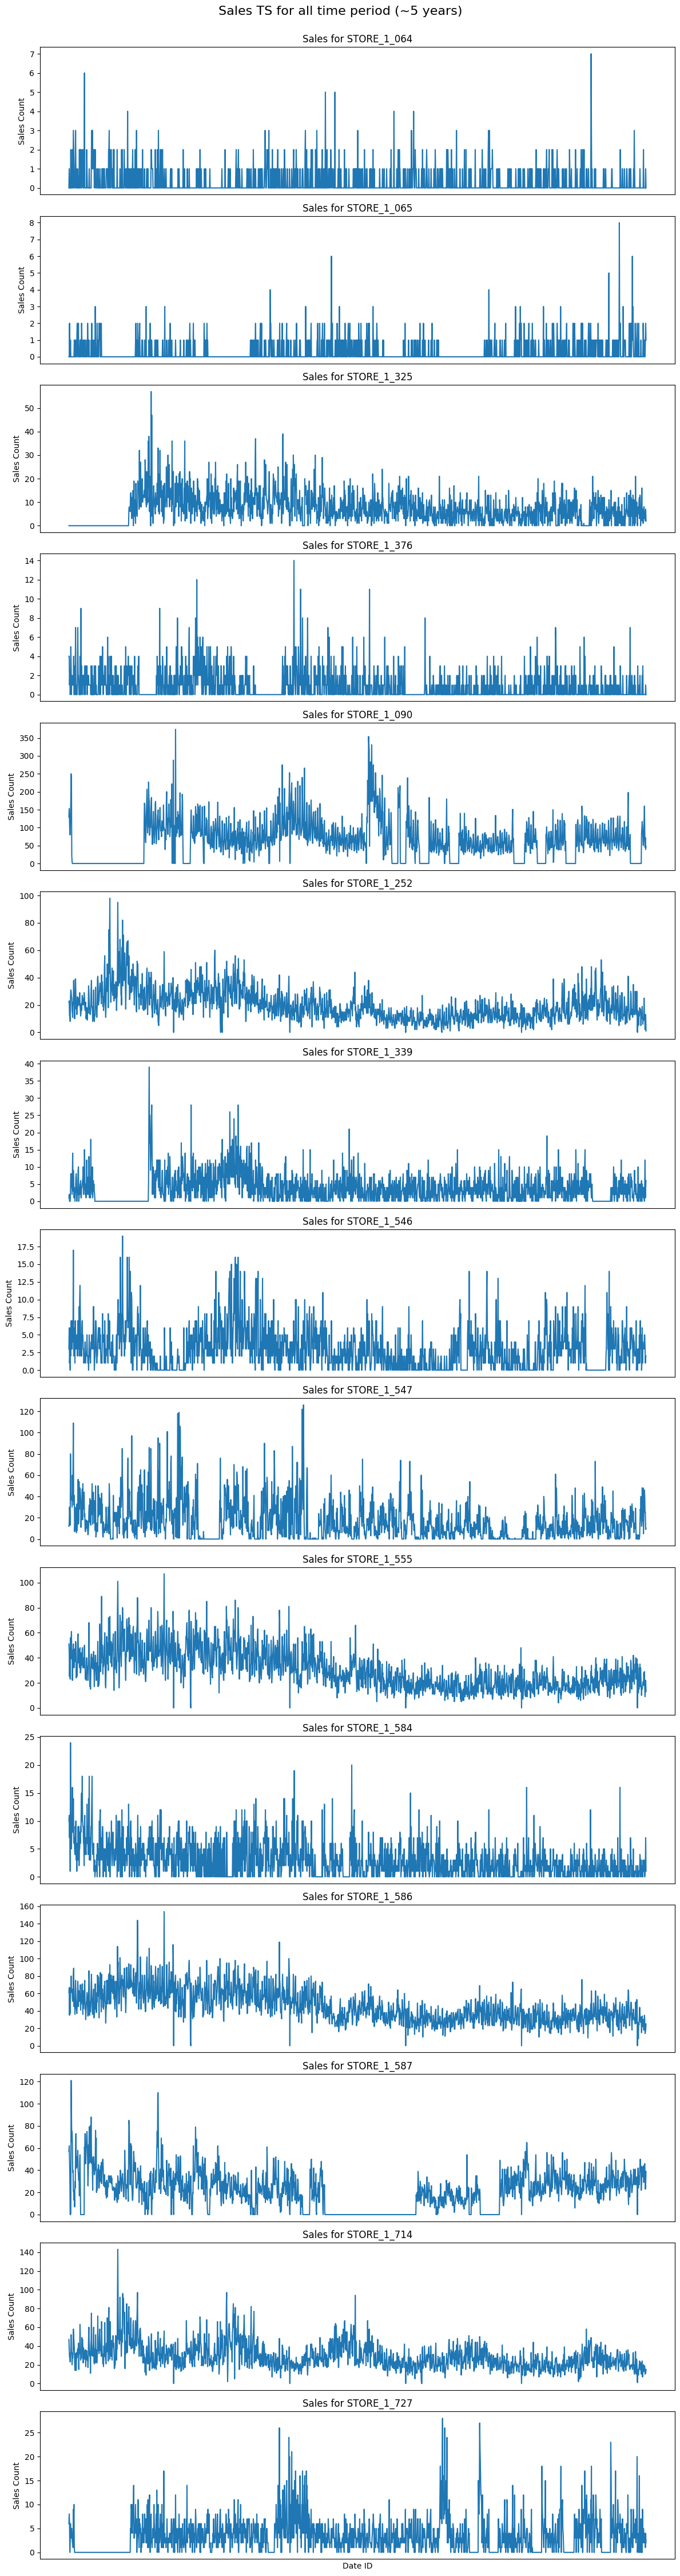

In [ ]:
# Plot sales for each item in subplots
fig, axes = plt.subplots(n_items, 1, figsize=(12, 3 * n_items), sharex=True)

for ax, item in zip(axes, unique_items):
    item_sales = sales[sales["item_id"] == item]
    ax.plot(item_sales["date_id"], item_sales["cnt"])
    ax.set_title(f"Sales for {item}")
    ax.set_ylabel("Sales Count")
    ax.set_xticks([])

fig.suptitle("Sales TS for all time period (~5 years)", fontsize=16, y=1)
axes[-1].set_xlabel("Date ID")
plt.tight_layout()
plt.show()

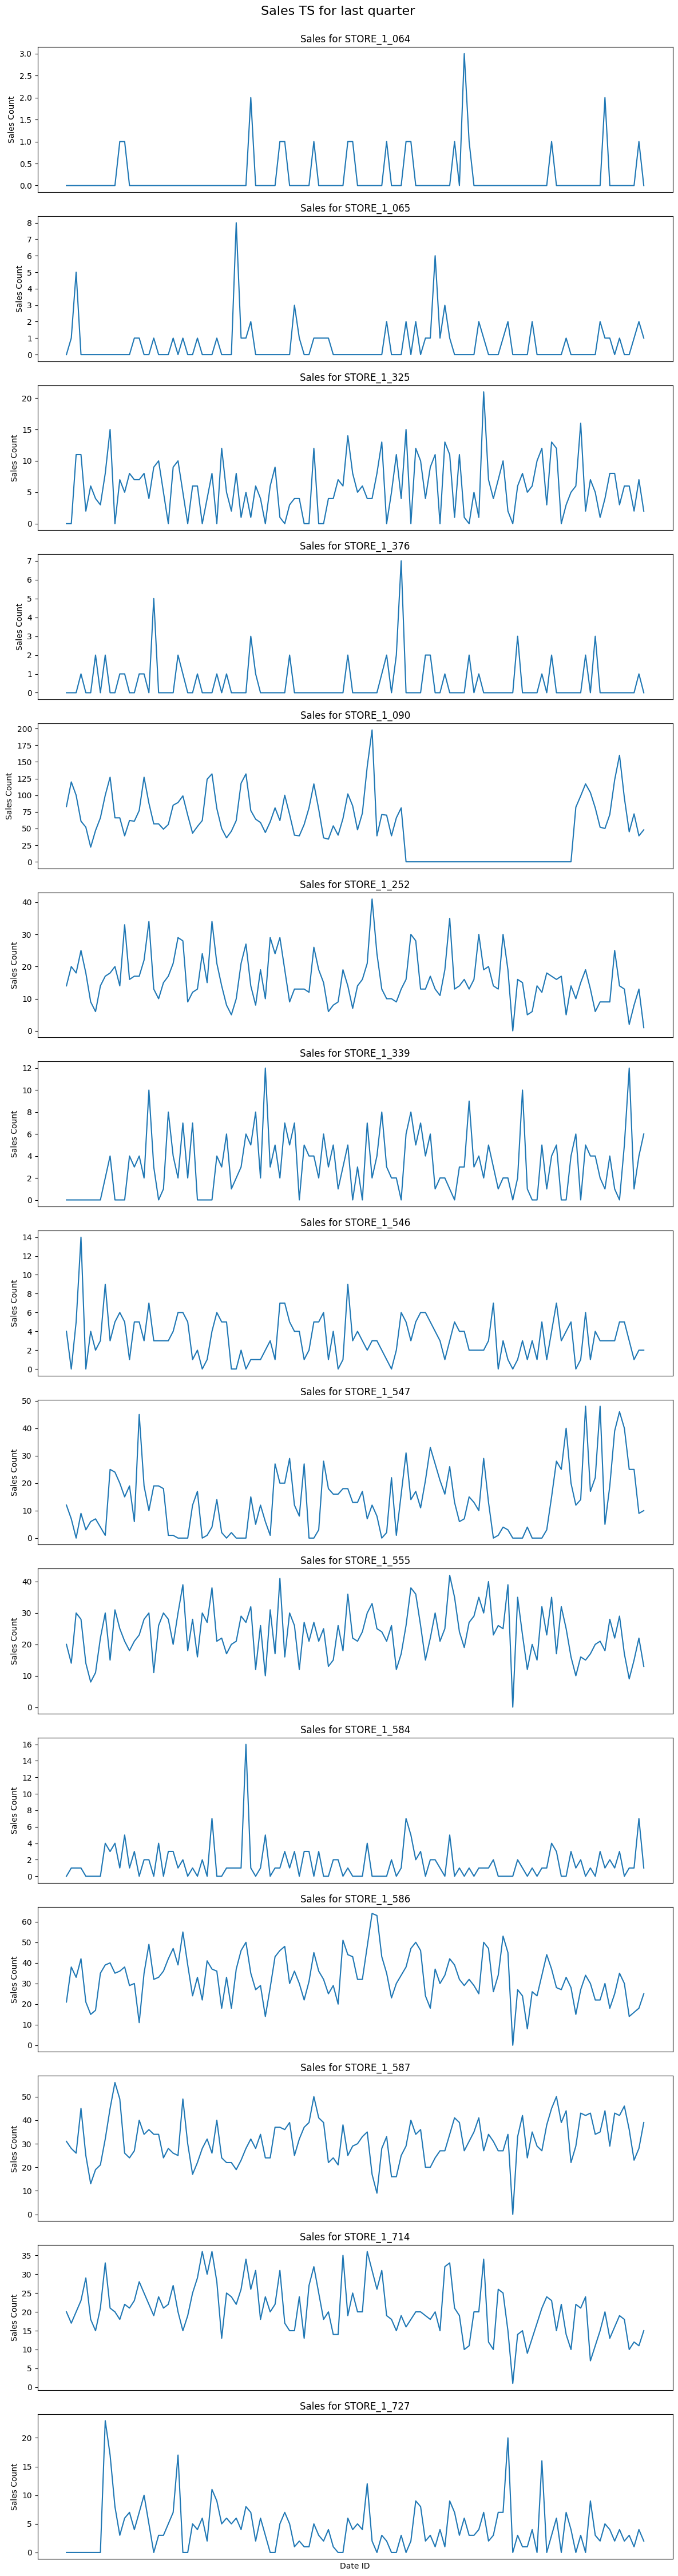

In [ ]:
# Plot sales for each item in subplots
fig, axes = plt.subplots(n_items, 1, figsize=(12, 3 * n_items), sharex=True)

for ax, item in zip(axes, unique_items):
    item_sales = sales[sales["item_id"] == item][-120:]  # Last quarter
    ax.plot(item_sales["date_id"], item_sales["cnt"])
    ax.set_title(f"Sales for {item}")
    ax.set_ylabel("Sales Count")
    ax.set_xticks([])

fig.suptitle("Sales TS for last quarter", fontsize=16, y=1)
axes[-1].set_xlabel("Date ID")
plt.tight_layout()
plt.show()

Наблюдения:
* в каждом ВР хорошо наблюдаются частые периодические пики продаж (предполагаю, что это недельные сезонности - на выходных спрос больше)
* почти в каждом ВР есть отрезки с нулевыми продажами. Как краткосрочные (товар действительно покупают не каждый день), так и долгосрочные (возможно товар закончился/проблемы с поставкой)
* у некоторых ВР отсутствует выраженный долгосрочный тренд продаж (064), а у некоторых присутствует (252)
* часто наблюдаются вплески продаж (как однодневные, так и довольно продолжительные (2-3 недели)), однако называть это аномалиями не хочется, так как предполагаю, что это может быть причиной праздников (данные по которым у нас есть)
* среди 15 товаров есть как популярные (090 - покупают в среднем по 150 раз в день), так и довольно редкие (064 - 1 продажа в день)